# 16 - Exploratory Data Analysis (EDA)

## Introduction to EDA
**Exploratory Data Analysis (EDA)** is a critical step in any data science project. It involves visualizing and summarizing the data to understand its structure, distribution, and underlying patterns. EDA can help uncover trends, relationships between variables, and any anomalies that might require attention before modeling.

### Benefits of EDA:
1. **Data Cleaning**: Identify and handle missing or inconsistent data.

2. **Data Understanding**: Get an overall sense of the structure and quality of the data.

3. **Feature Selection**: Identify important variables for the model.

4. **Data Transformation**: Prepare the data for modeling (e.g., normalization, scaling).

5. **Detect Outliers**: Spot any extreme values that may distort the model.

The main purpose of **EDA** is to gain a deep understanding of the data, allowing us to make informed decisions about which modeling techniques to use, how to handle missing values, and how to engineer features that will improve model performance.

## Descriptive Analysis vs EDA
**Descriptive analysis** and **EDA**, depending on how they're implemented, may be equivalent, but we can distinguish them by their main differences:

- **Descriptive Analysis**: Focuses on describing the main characteristics of a data set using *descriptive statistics*, such as *mean*, *median*, *range*, and so on. Essentially, provides a clear and summarized description of the data.

- **EDA**: Goes a step further, as it focuses on exploring *patterns*, *relationships*, *anomalies*, etc., in the data using more sophisticated **graphs** and statistics. Its main objective is to understand **the structure of the data**, relationships between variables and to formulate **hypotheses** or **intuitions** for further analysis or modeling.

## Machine Learning Flow

<p align="center">
    <img src="imgs/eda1.png" alt="Alt text">
</p>

The ideal **Machine Learning Flow** should contain the following phases:

1. **Problem Definition**: A *need* is identified to be solved using Machine Learning.

2. **Dataset Acquisition**: Once the problem is defined, *data collection* becomes necessary. This can involve capturing data from various sources such as databases, APIs, web scraping, or real-time data streams.

3. **Store the Information**: The best way to store the information is in a *database* to ensure secure and efficient access. Flat files should be avoided when possible, since they're not secure or optimized for scalability and querying.

4. **Descriptive Analysis**: Before diving into EDA, it’s important to examine the raw data’s basic *statistical measures*—such as means, medians, distributions, and standard deviations—to understand its overall structure. Knowing these distributions helps in selecting an appropriate model later.

5. **EDA**: In this step, we explore the data more deeply to identify important features, eliminate irrelevant or redundant variables, and discover relationships between them. EDA also helps in identifying outliers and understanding the data’s complexities.

6. **Modeling and Optimization**: Once the data is prepared, it’s time to choose and train a model that best fits the data. After the initial training, *model optimization* is essential to improve performance through hyperparameter tuning or model refinement.

7. **Deployment**: After optimizing the model, it needs to be deployed into a controlled environment where it can make predictions on real-world data. This is where the model starts bringing value to end-users or business processes.

---
## Example: Titanic Dataset

### Steps 1 & 2: Problem Definition & Dataset Acquisition

#### Problem Definition:
Using the Titanic passenger data, we aim to predict whether a given passenger survived or not based on features such as *age*, *gender*, *passenger class*, *fare*, and other factors. This is a binary classification problem where the target variable is the `Survived` column, which takes on the values:

- `0`: Passenger did not survive

- `1`: Passenger survived

#### Key Objective:
The key objective is to build a machine learning model that can accurately predict the likelihood of a passenger surviving, given their individual characteristics. The output will be a probability or binary classification (survived vs. not survived).

#### Dataset Acquisiton
We'll use the Titanic dataset, which contains several features about each passenger that we’ll use to make our predictions.

First, let’s load the dataset and inspect its structure.

In [1]:
import pandas as pd

# Load Titanic dataset from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Target Variable
The target variable (what we want to predict) is:

- `Survived`: This column indicates whether the passenger survived (`1`) or did not survive (`0`).

##### Features
Here are the main features of the dataset that will be used to predict survival:

- `PassengerId`:

    - **Description**: A unique identifier for each passenger.

    - **Usefulness**: This is simply an ID number and we can assume it doesn't provide any information for predicting survival. It will likely be dropped.

- `Pclass`:

    - **Description**: The passenger’s class (1st, 2nd, or 3rd).

    - **Usefulness**: This may be an important feature because we can assume survival rate varied significantly by class (e.g. Passengers in 1st class are known to have a higher chance of survival).

- `Name`:

    - **Description**: The full name of the passenger.

    - **Usefulness**: This feature doesn't provide predictive information for survival. However, we could extract titles (Mr., Mrs., etc.) from the names, which might be predictive, as they could be correlated with social status or age.

- `Sex`:

    - **Description**: The gender of the passenger.

    - **Usefulness**: This is a key feature, as women had a significantly higher survival rate than men.

- `Age`:

    - **Description**: The age of the passenger.

    - **Usefulness**: Age is likely important in determining survival, as younger passengers (e.g., children) were more likely to survive.

- `SibSp`:

    - **Description**: Number of siblings or spouses aboard the Titanic.

    - **Usefulness**: This feature indicates the family size and may help predict survival, as people traveling with families might have different survival rates compared to solo travelers.

- `Parch`:

    - **Description**: Number of parents or children aboard the Titanic.

    - **Usefulness**: Like `SibSp`, this feature indicates family size. It could also be used to understand whether passengers traveling with families had different survival rates.

- `Ticket`:

    - **Description**: The ticket number of the passenger.

    - **Usefulness**: The ticket number likely has little direct influence on survival, but patterns in ticket numbers (such as family tickets) could be explored. For most analyses, this column can be dropped.

- `Fare`:

    - **Description**: The fare paid for the ticket.

    - **Usefulness**: The fare could correlate with passenger class and possibly indicate a passenger’s wealth, which might influence survival. It’s a useful feature.

- `Cabin`:

    - **Description**: The cabin number where the passenger stayed.

    - **Usefulness**: This feature could provide some insight into the passenger’s location on the ship, which might influence survival.

- `Embarked`:

    - **Description**: The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).

    - **Usefulness**: This feature may provide some predictive value, as the port of embarkation could be related to socio-economic factors or access to lifeboats.

### Step 3: Store the Information
Once the dataset has been acquired and inspected, the next step is to store it securely.

While flat files like CSVs are commonly used for storing data, they are not ideal for large datasets or secure access. In professional settings, storing the data in a **database** ensures better security, scalability, and efficiency.

#### 1. Storing the Dataset as a CSV File:
We can first store the dataset as a flat CSV file, which is easy to share and load.

In [2]:
import os

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/titanic_raw.csv', index=False)

print(f'Dataset stored as {output_dir}/titanic_raw.csv')

Dataset stored as data/raw/titanic_raw.csv


This code saves the raw Titanic dataset in the `data/raw/` folder. The CSV file format is widely used and easy to work with, but as noted earlier, it is not the most secure or efficient format for long-term storage or querying.

#### 2. Storing the Dataset in a Database (Using SQLite):
For better security and more efficient data management, we can store the dataset in an SQLite database. SQLite is a lightweight, serverless database that works well for small projects. 

We'll use `SQLAlchemy`, a Python SQL toolkit, to interact with the SQLite database.

##### Step 1: Install SQLAlchemy (if needed)
You can install SQLAlchemy with the following command:

In [3]:
!pip install sqlalchemy

##### Step 2: Setting Up SQLAlchemy and SQLite
Here’s how you can store the Titanic dataset in an SQLite database using SQLAlchemy:

In [4]:
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called titanic.db)
engine = create_engine('sqlite:///data/titanic.db')

# Store the dataset in a table called 'titanic_data'
df.to_sql('Titanic_Data', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'Titanic_Data' table.")

Dataset stored in SQLite database as 'Titanic_Data' table.


This stores the Titanic dataset as a table named `Titanic_Data` in a SQLite database located at `data/titanic.db`. If the table already exists, the `if_exists='replace'` option will replace it with the new data.

##### Step 3: Querying the Stored Data
Once the data is stored in the SQLite database, you can query it using SQL commands. For example, here’s how to load the stored data back into a pandas DataFrame:

In [ ]:
# Query the data from the SQLite database
df_from_db = pd.read_sql('SELECT * FROM Titanic_Data', con=engine)

# Display the first few rows to confirm the data is loaded correctly
df_from_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


#### Why Store the Data in a Database?
Storing the data in a database offers several advantages:

1. **Security**: Databases can control access to data and prevent unauthorized use.

2. **Scalability**: Databases are optimized for handling large datasets and complex queries.

3. **Efficiency**: Querying data is faster in databases compared to reading from large flat files like CSVs.

### Step 4: Descriptive Analysis
Once the data is stored, the next phase in the Machine Learning Flow is **Descriptive Analysis**. In this step, we calculate and examine basic statistical measures to understand the distribution and structure of the dataset.

This analysis helps us gain a better sense of the data’s general characteristics, such as central tendencies, variability, and the presence of any outliers.

Let's start by generating descriptive statistics for numerical and categorical variables.

#### Descriptive Statistics for Numerical Variables
The `.describe()` function will output summary statistics for numerical variables such as:

- **Count**: The number of non-null entries.

- **Mean**: The average value.

- **Standard Deviation**: The spread of the data.

- **Minimum and Maximum**: The range of the data.

- **Quartiles**: The 25th, 50th (median), and 75th percentiles.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Descriptive Statistics for Categorical Variables
For categorical variables, we can examine how many distinct values each feature contains and how the values are distributed.

In [7]:
# Check the unique values in categorical columns
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Repeat this for other categorical columns like `Pclass`, `Embarked`, and `Survived` to understand the distribution of passengers by class, port of embarkation, and survival status.

In [8]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Visualizing Distributions
To complement the summary statistics, it's important to visualize the distribution of the numerical features using histograms and boxplots. This will help us spot outliers and understand the spread of the data more clearly.

##### 1. Histograms for Numerical Features:

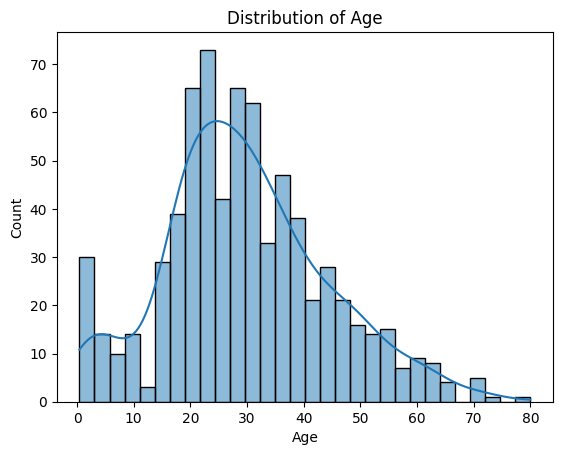

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'Age' column
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

This plot will show the distribution of ages among passengers. You can create similar plots for other numerical columns, such as `Fare`.

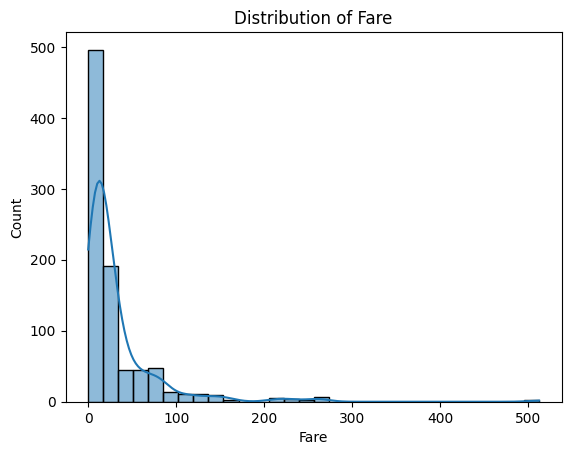

In [12]:
# Histogram for Fare
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()

##### 2. Boxplots for Outlier Detection:
Boxplots are useful for detecting outliers in the dataset. Let’s use a boxplot to examine the distribution of `Age` and spot any potential outliers.

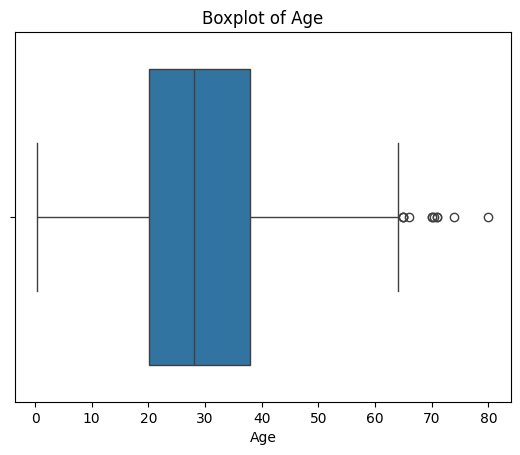

In [13]:
# Boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

You can also create boxplots for `Fare` and other numerical features to check for outliers.

#### Insights from Descriptive Analysis
As you review the descriptive statistics and visualizations, you should start identifying patterns or potential issues:

1. **Missing Data**: From the summary statistics, we can see that `Age` has missing values. We’ll need to handle this later.

2. **Outliers**: The boxplot for `Fare` may show a few extreme values (outliers), which could affect the performance of machine learning models if left untreated.

3. **Class Imbalance**: The survival rate can be checked to see if there is a class imbalance. If significantly more passengers did not survive than those who did, it might affect the model’s performance.

In [14]:
# Check the survival rate (class balance)
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

This will output the percentage of passengers who survived vs. those who did not, helping you identify if class imbalance might be an issue for the model.

#### Conclusion of Descriptive Analysis

By performing descriptive analysis, we gain a clearer understanding of the dataset’s structure, and we can now move on to **Exploratory Data Analysis (EDA)**, where we’ll dive deeper into relationships between features and survival.

Additionally, the insights from this step (like missing values or outliers) will guide how we handle the data in later steps, such as feature engineering and modeling.

### Step 5: Exploratory Data Analysis
In this step, we will do some deeper exploration along with data cleaning/preprocessing and standardization.

Let's start by obtaining the number of rows and columns.

In [14]:
# Obtain dimensions of dataframe
# (# rows, # columns)
df.shape

(891, 12)

The number of rows and columns in a dataset provides an initial overview of its **size** and **complexity**. Here's why checking the dimensions is important:

- **Understanding Dataset Size**: The number of rows represents the number of data points (samples) in the dataset. 
    - A large number of rows suggests more data to work with, while a smaller dataset may require special handling.

- **Understanding the Feature Set**: The number of columns represents the features (or variables) available for analysis. Knowing the number of columns helps gauge how many potential predictors exist for the target variable. 

    - Too many features might require dimensionality reduction techniques, while too few may limit model complexity.

- **Verifying Dataset Integrity**: The dimensions also help confirm that the dataset loaded correctly. 

    - If the number of rows or columns seems unexpectedly low, it could indicate a problem with data loading or missing columns.

We can always grab the column names as needed:

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

And we can check information about the data types, and how many non-NaN rows exist for each column:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


After obtaining the information, we can draw some initial observations, such as:

- There are a total of 891 rows (in this case, passengers) and 12 columns, among which we find the **target** or **class** to predict to be `Survived`

- We can see that some columns like `Age`, `Cabin`, and `Embarked` contain missing values. We will have to address these.

- The dataset has 7 **numerical** (`int64` or `float64`) features and 5 **categorical**/**string** (`object`) features.

We should note, though, that sometimes the data type for a feature may not be read in correctly (e.g., a numerical column might be read as a string), and in such cases, it may be necessary to manually correct the data type to ensure proper analysis and modeling.

#### Eliminate Duplicates
It is important to eliminate duplicated data in a DataFrame before placing them in a model. We will always need to take care to inspect duplicates.

If we use `duplicated()` as below, this will return to us all rows which are duplicates. This will only give us a duplicate if *all* information across *all* columns are repeated.

Below, we can see, there are no duplicated rows.

In [17]:
df.duplicated().sum()

0

If we wanted to remove these duplicates, we would run the following code:

In [19]:
# df = df.drop_duplicates()

#### Eliminate Irrelevant Information
For training a model, not all the columns/features in the dataset are necessary. Which information do we think is actually likely to predict if someone survived?

We can remove features that we don't believe have useful information content, such as `PassengerID`. Does it really mean anything if a passenger is `#103` vs `#854`?

We can also remove `Name`, `Ticket`, and `Cabin`. It is unlikely that someone's name was important for whether they lived or not, same with their ticket number.

`Cabin` could be useful, but this is a string, and there are **147** different `Cabin` values. We'd have to find a way to convert these to numbers for a model to read. Also, most appear only once in the dataset. So we can remove them from our dataset.

In [18]:
df['Cabin'].nunique()

147

In [19]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Let's drop these columns:

In [20]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Dropping Columns with Excessive Missing Values
Missing data can significantly impact model performance if not handled properly. At this stage, we won’t be imputing missing values but will instead drop any columns that have an excessive proportion of missing data.

##### Observing Missing Values
We can start by observing the number and proportion of missing values in each column:

In [21]:
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


This will give you a clearer picture of which columns have missing values and what proportion of each column is affected.

##### Defining a Threshold for Dropping Columns
Next, we define a threshold to determine when a column should be dropped. For example, we may choose to drop any column where more than **30%** of the values are missing. This threshold can vary depending on the use case and how important the feature might be.

In [22]:
# Define the threshold (e.g., 30%)
threshold = 30

# Drop columns where the percentage of missing values exceeds the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns from the dataframe
df = df.drop(columns=columns_to_drop)

print(f"Following columns were dropped: {list(columns_to_drop)}")

Following columns were dropped: []


##### Confirming Column Removal
After dropping the columns, it’s always a good idea to confirm which columns were removed and to re-check the dataframe’s structure.

In [23]:
# Check the remaining columns after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


This will give you an updated look at the dataset and confirm that the columns with excessive missing data have been removed.

#### Analysis of Univariate Variables
Now we'll perform analysis of **univariate variables**. This means we'll analyze each single (*uni-*) variable at a time. This can be done with histograms or boxplots.

We can divide this analysis into

1. **Categorical Variable Analysis**, and

2. **Numerical Variable Analysis**

##### 1. Categorical Variable Analysis

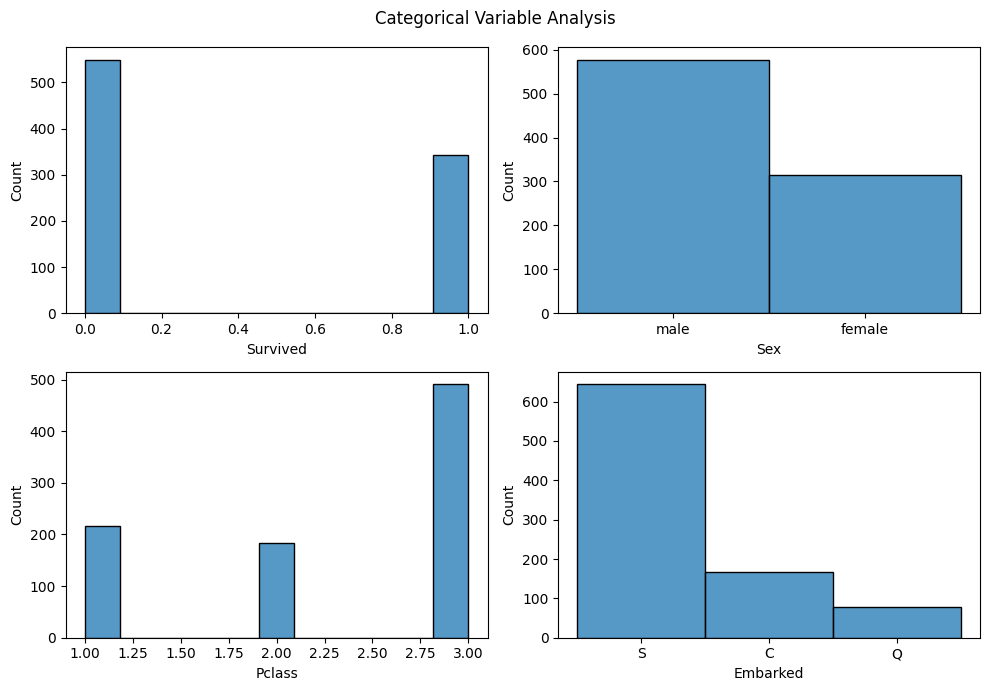

In [27]:
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "Survived")
sns.histplot(ax = axis[1, 0], data = df, x = "Pclass")
sns.histplot(ax = axis[0, 1], data = df, x = "Sex")
sns.histplot(ax = axis[1, 1], data = df, x = "Embarked")

plt.suptitle("Categorical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

FYI: C = Cherbourg; Q = Queenstown; S = Southampton

##### 2. Numerical Variable Analysis

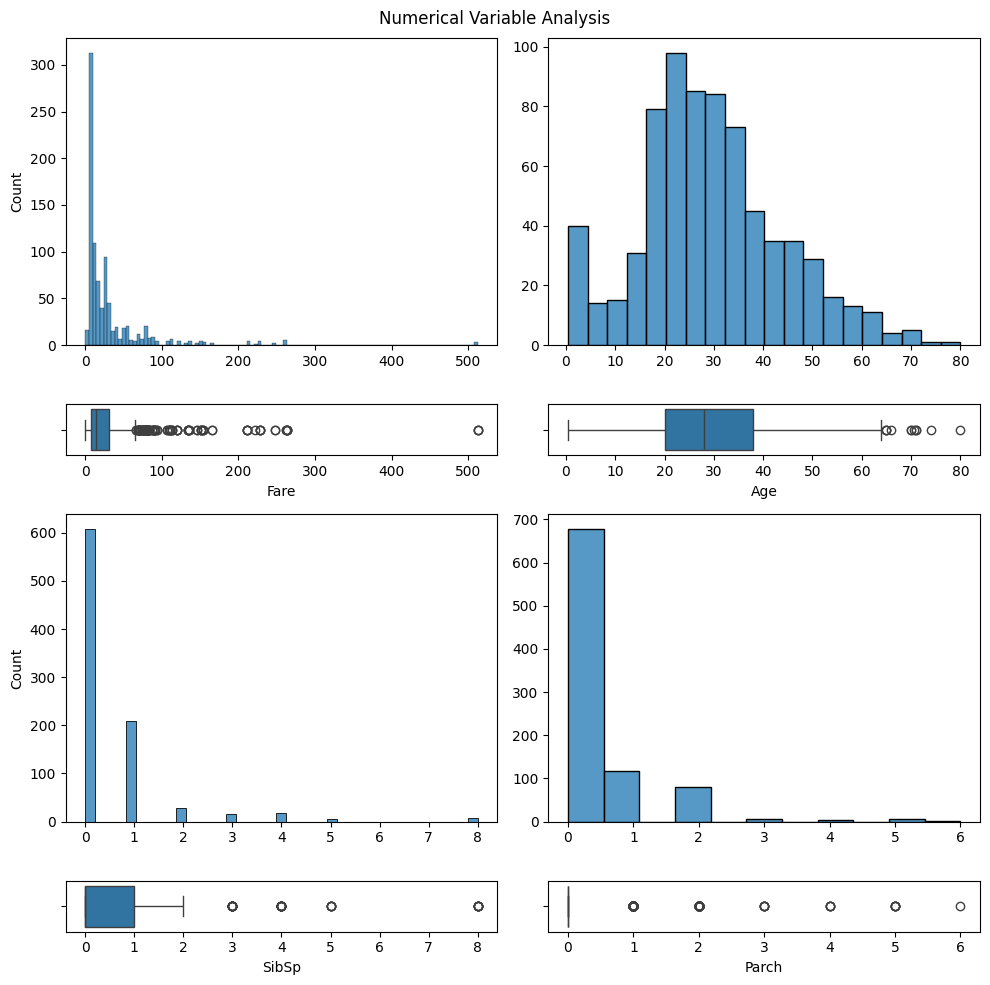

In [35]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "Fare").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Fare")
sns.histplot(ax = axis[0, 1], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Age")
sns.histplot(ax = axis[2, 0], data = df, x = "SibSp").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "SibSp")
sns.histplot(ax = axis[2, 1], data = df, x = "Parch").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "Parch")

plt.suptitle("Numerical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

We can see that all distributions appear to be asymmetric and right-skewed. The tail of outliers is to the right of the peak.

`Fare` is very skewed and has a few extreme outliers, while `Age` is less so.

**Note**: If we want to use `Fare` in a model we could try to log-transform it to "shrink" the outliers. But we don't need to do this step yet as some models can handle outliers better than others.

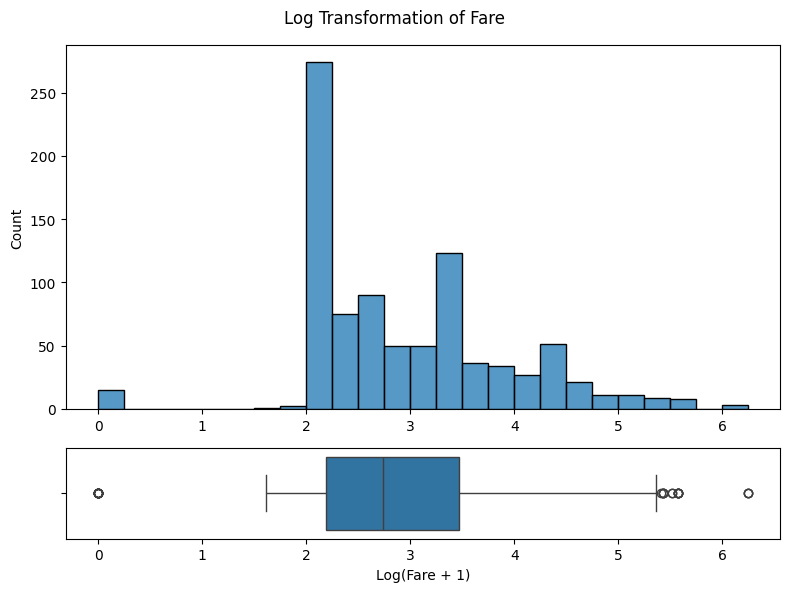

In [29]:
import numpy as np

# Create a figure with 2 subplots: one for the histogram and one for the boxplot
fig, axis = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})

# Apply log transformation to 'Fare' using log1p (log(x + 1)) to avoid log(0)
# Plot the log-transformed 'Fare' histogram and boxplot
sns.histplot(np.log1p(df['Fare']), bins=25, ax=axis[0]).set(xlabel = None)
sns.boxplot(x=np.log1p(df['Fare']), ax=axis[1])
axis[1].set_xlabel('Log(Fare + 1)')

# Adjust layout and show the plot
plt.suptitle("Log Transformation of Fare")
plt.tight_layout()
plt.show()

#### Analysis of Multivariate Variables
After analyzing features one at a time, we can analyze them in relation to each other (*multi-*).

We'll also split this up into:

1. **Numerical-Numerical Analysis**, and

2. **Categorical-Categorical Analysis**, and

3. **Numerical-Categorial Analysis**

##### 1. Numerical-Numerical Analysis

We'll start with comparing a numerical feature to another numerical feature. We'll use scatterplots and correlation analysis to do this.

Since we are interested in predicting the survival of each passenger, we'll first compare each numerical feature with the target `Survived`.

In [31]:
# Our numerical features
numerical_features

['Age', 'SibSp', 'Parch', 'Fare']

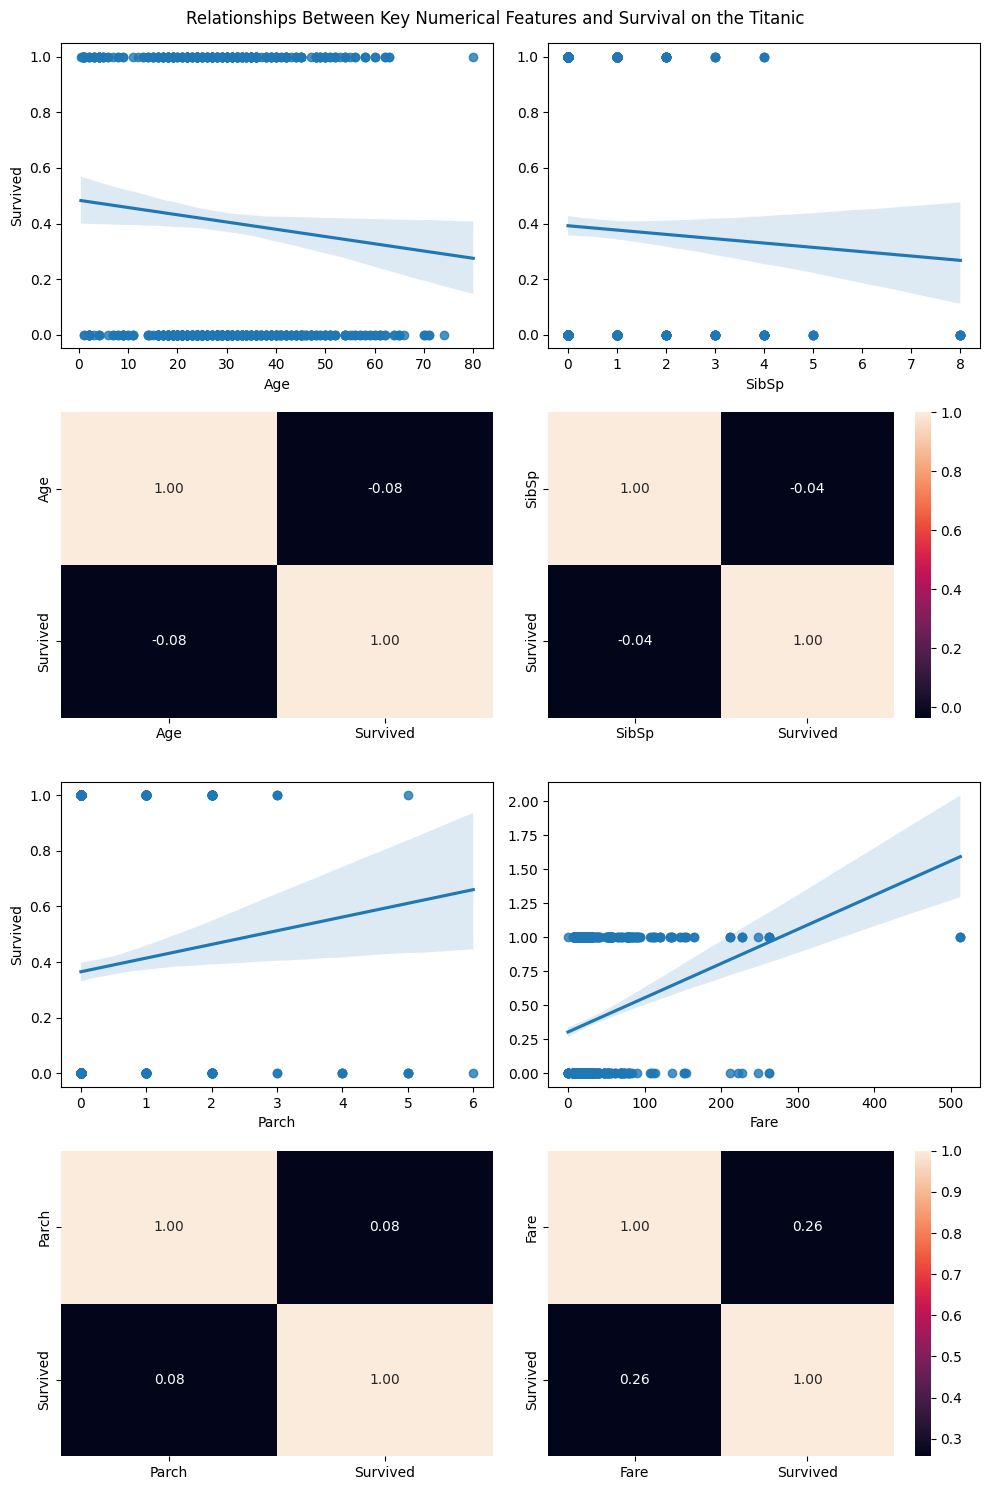

In [43]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "Age", y = "Survived")
sns.heatmap(df[["Age", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "SibSp", y = "Survived").set(ylabel=None)
sns.heatmap(df[["SibSp", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "Parch", y = "Survived")
sns.heatmap(df[["Parch", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = df, x = "Fare", y = "Survived").set(ylabel=None)
sns.heatmap(df[["Fare", "Survived"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

plt.suptitle("Relationships Between Key Numerical Features and Survival on the Titanic", y=0.99)
plt.tight_layout()

# Show the plot
plt.show()

The off-diagonal values of the correlation map tell us how strongly correlated, or anti-correlated the features are to `Survived`.

The correlation coefficients go from **-1 to +1**. There appears to be a positive correlation between `Fare` and `Survived`, the higher the fare price the more likely the passenger is to survive. But it is not very strong, only **0.26** out of 1.

None of these are decisive.

We can also do a **numerical-numerical analysis** on any two given numerical features, we don't have to compare each to `Survived`.

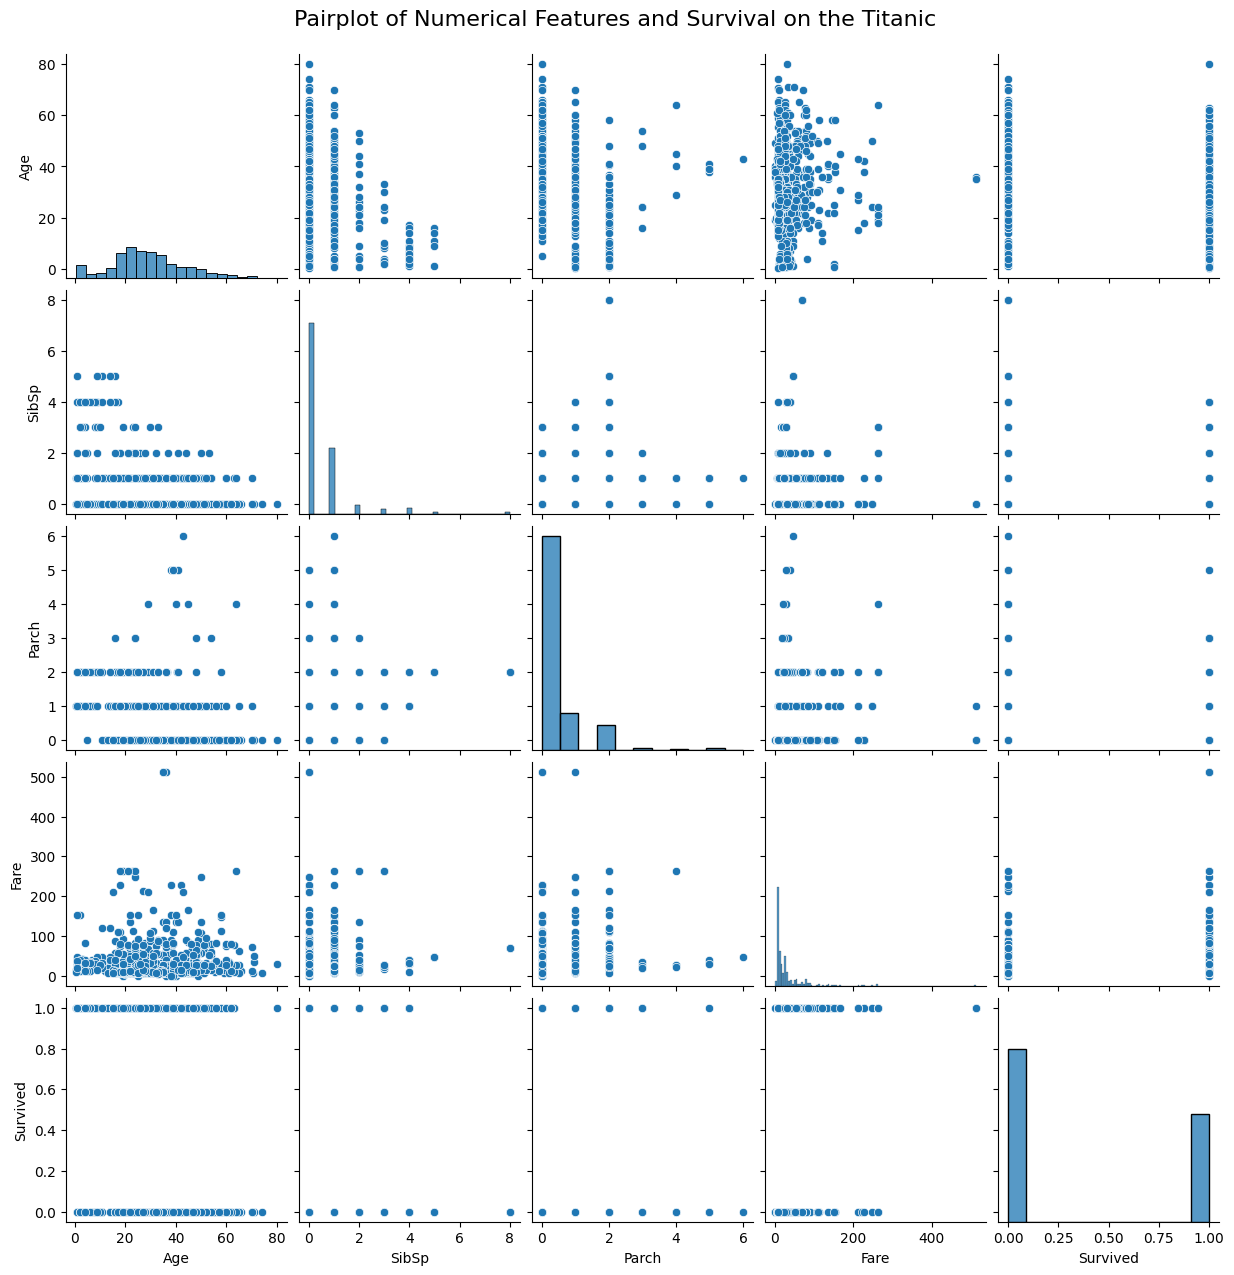

In [38]:
# Warning! Pairplots can be slow!
sns.pairplot(data = df[numerical_features + ['Survived']])
plt.suptitle("Pairplot of Numerical Features and Survival on the Titanic", y=1.02, fontsize=16)
plt.show()

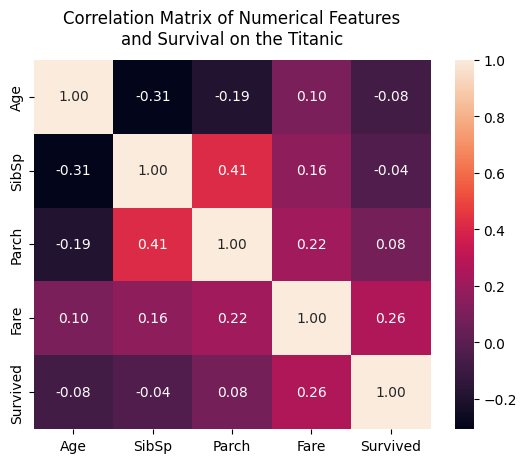

In [48]:
sns.heatmap(df[numerical_features + ['Survived']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features\nand Survival on the Titanic", y=1.02)
plt.show()

##### 2. Categorical-Categorical Analysis
We can now compare categorical features to other categorical features.

First, let's compare some of the categorical features with the `Survived` target, since that is what we want to predict.

We'll use `sns.countplot` to make bar plots of the categorical features, and we'll use `hue = "Survived"` to further divide the bar plots into `Survived=0` vs `Survived=1`.

In [49]:
# Our categorical features
categorical_features

['Survived', 'Pclass', 'Sex', 'Embarked']

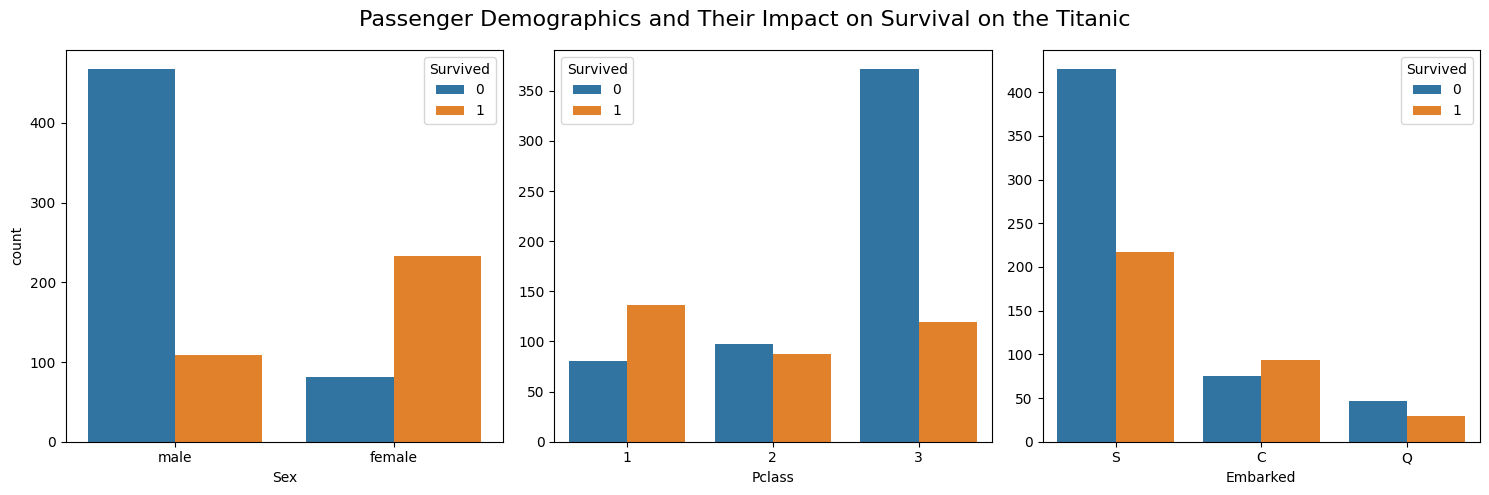

In [50]:
fig, axis = plt.subplots(1,3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[1], data = df, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[2], data = df, x = "Embarked", hue = "Survived").set(ylabel = None)

fig.suptitle("Passenger Demographics and Their Impact on Survival on the Titanic", fontsize=16)
plt.tight_layout()

plt.show()

The following conclusions can be drawn from the above graph:

- Women survived with a higher proportion as opposed to men. This is because women had priority over men in the evacuation plans.

- Those who traveled in a better class on the Titanic had a higher chance of survival.

We can also compare multiple variables at the same time. The below compares three variables at once, the `Sex`, the `Pclass`, and `Survived`.

**Note**: we use `sns.barplot` here.

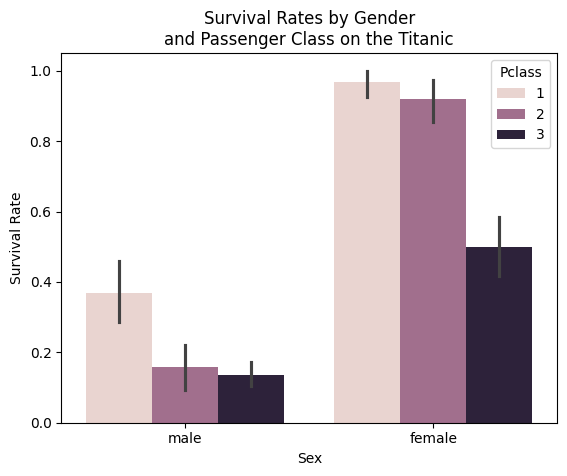

In [54]:
sns.barplot(data = df, x = "Sex", y = "Survived", hue = "Pclass")
plt.ylabel("Survival Rate")
plt.title("Survival Rates by Gender\nand Passenger Class on the Titanic")
plt.show()

What the plot represents:
- **X-axis (`Sex`)**: Represents the gender of the passengers, either male or female.

- **Y-axis (`Survived`)**: Represents the survival rate (i.e., the proportion of passengers who survived).

- **Hue (`Pclass`)**: This adds a color distinction based on passenger class (1st, 2nd, or 3rd class), allowing you to see the survival rate by both gender and class.

What this plot tells us:

- **Survival Rates by Gender**: You can compare the survival rates of male and female passengers. Typically, female passengers had a higher survival rate compared to male passengers, reflecting the "women and children first" protocol during the Titanic disaster.

- **Survival Rates by Passenger Class**: Within each gender category, you can compare survival rates across different passenger classes. For example, 1st-class passengers (both male and female) generally had higher survival rates compared to 2nd and 3rd class passengers. The survival rate tends to decrease as you move from 1st class to 3rd class.

- **Interaction of Gender and Class**: The plot shows how gender and class together influence the survival rate. For example, female passengers in 1st class likely had the highest survival rates, while male passengers in 3rd class might show the lowest survival rates.

We can also do a correlation analysis between all categorical variables. First, we need to turn `Sex` and `Embarked` into numerical features so calculations can be done on them. Many models require you to encode or factorize categorical features.

In [55]:
# pd.factorize() can factorize categorical features to make them numeric (e.g. {"male": 0, "female": 1})
df["Sex_n"] = pd.factorize(df["Sex"])[0]
df["Embarked_n"] = pd.factorize(df["Embarked"])[0]

In [56]:
# Inspect the original (categorical) feature and the factorized (numeric) feature
df[["Sex", "Sex_n"]]

,Sex,Sex_n
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,1
889,male,0


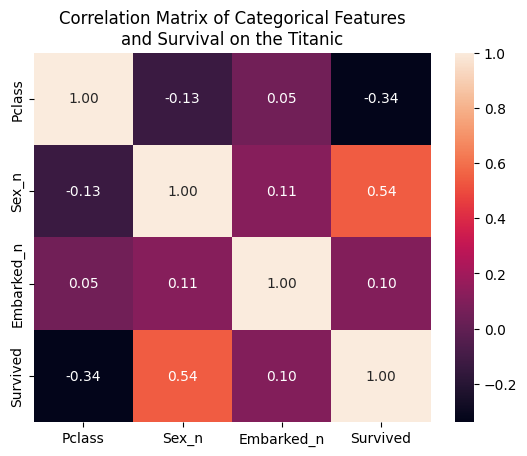

In [59]:
categorical_features = ['Pclass', 'Sex_n', 'Embarked_n']

sns.heatmap(df[categorical_features + ['Survived']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Categorical Features\nand Survival on the Titanic")
plt.show()

This also hints that there is a relation between the class and the survival of a passenger.

And we can also see a strong correlation between the `Sex_n` and the `Survived`, now that we are working with a numerical version of `Sex`.

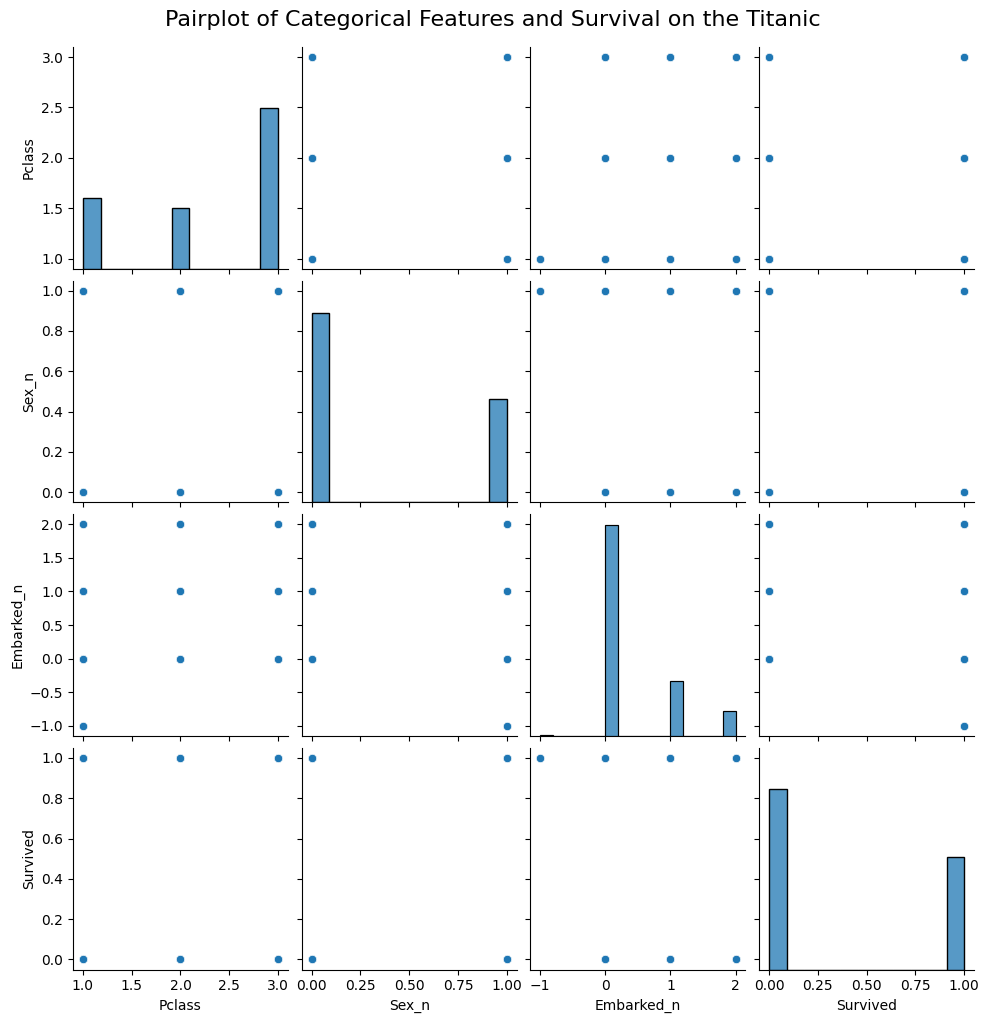

In [61]:
# Warning! Pairplots can be slow!
# And not too useful for categorical data
sns.pairplot(data = df[categorical_features + ['Survived']])
plt.suptitle("Pairplot of Categorical Features and Survival on the Titanic", y=1.02, fontsize=16)
plt.show()

##### 3. Numerical-Categorical Analysis

In [62]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['Age', 'SibSp', 'Parch', 'Fare']
Categorical features: ['Pclass', 'Sex_n', 'Embarked_n']


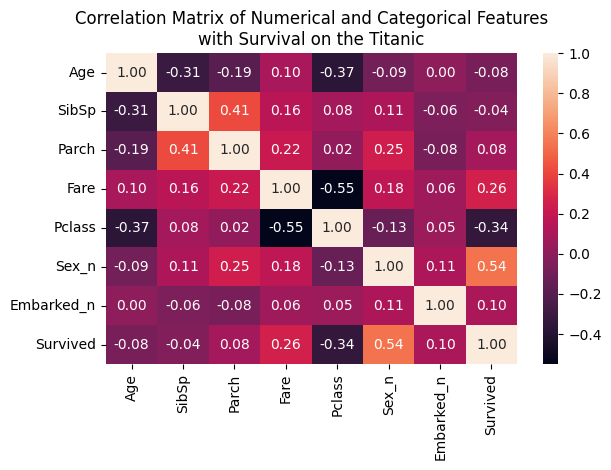

In [66]:
sns.heatmap(df[numerical_features + categorical_features + ['Survived']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical and Categorical Features\nwith Survival on the Titanic")
plt.tight_layout()

There is a strong negative relationship between class type (`Pclass`) and passenger age (`Age`) (those traveling in first class were older) and between class (`Pclass`) and fare paid (`Fare`), which makes a lot of sense. The rest of the correlations remain the same as previously seen.

We can investigate these in more detail.

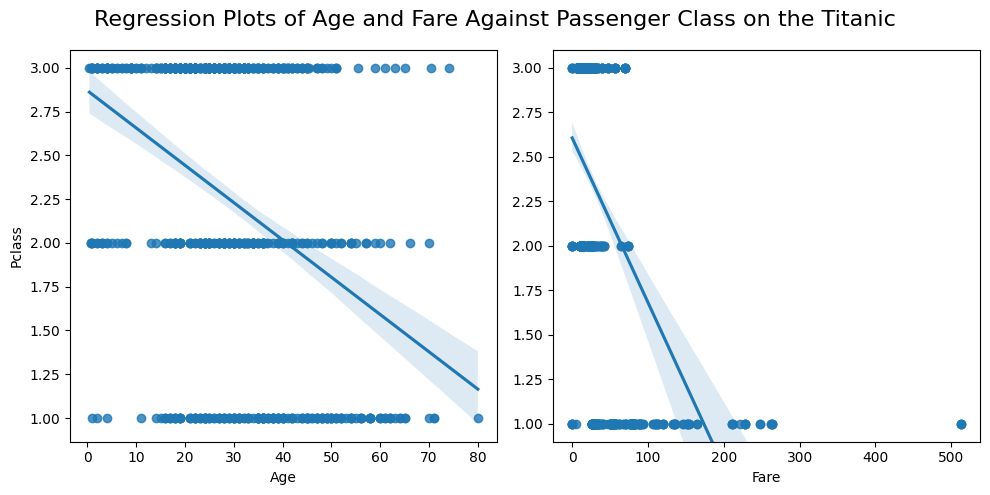

In [68]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "Age", y = "Pclass")
sns.regplot(ax = axis[1], data = df, x = "Fare", y = "Pclass").set(ylabel = None, ylim = (0.9, 3.1))

fig.suptitle("Regression Plots of Age and Fare Against Passenger Class on the Titanic", fontsize=16)
plt.tight_layout()

plt.show()

#### Feature Engineering
**Feature engineering** is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques such as normalization, data transformation, and so on.

We will also check for **outliers**, investigate **missing values**, and correct these as well.

##### Train/Test Split
In order to do feature engineering we must first further prepare out data for a model by splitting into a **train set** and a **test set**.

This step is inevitable for most machine learning models, and we want to perform this step before doing any feature engineering. We will explain why, shortly, but first let us explore what the **train set** and testing **test set** is used for.

See: [Feature Engineering - Train/Test Split](https://docs.google.com/presentation/d/1mwxfr3qSFUsdOUvjQCjVRw0Bg9QqhwqXDYL9OQo3shc/edit?usp=sharing)

##### Outlier Analysis
We can visualize the outliers in the entire dataset before splitting it into train and test sets.

If we want to remove a row with an outlier, we can also remove it from the data before splitting.

But if we want a method to *define* outliers and *replace* them, then **we'll need to perform a train/test split first**.

For initial **Outlier Analysis** we can look at the `min` and `max` compared to the `mean` or the `25%` and `75%` quartiles of the data. Let's do that for the entire dataset.

In [43]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.359147
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


We can also use **boxplots**.

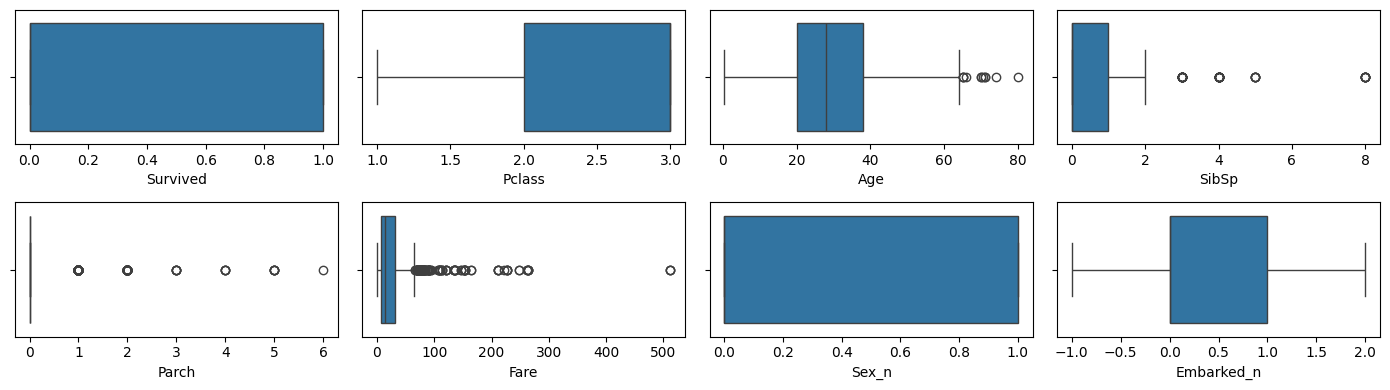

In [44]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], data = df, x = "Survived")
sns.boxplot(ax = axis[0, 1], data = df, x = "Pclass")
sns.boxplot(ax = axis[0, 2], data = df, x = "Age")
sns.boxplot(ax = axis[0, 3], data = df, x = "SibSp")
sns.boxplot(ax = axis[1, 0], data = df, x = "Parch")
sns.boxplot(ax = axis[1, 1], data = df, x = "Fare")
sns.boxplot(ax = axis[1, 2], data = df, x = "Sex_n")
sns.boxplot(ax = axis[1, 3], data = df, x = "Embarked_n")

plt.tight_layout()

plt.show()

We can argue that `Age`, `SibSp`, `Parch` and `Fare` have outliers (beyond the `25%` and `75%` quartiles). There is one major outlier of `Fare` $\approx 500$.

*One method* of determining outliers is to use the **interquartile range (IQR)** (another is to use the standard deviation). Let's do this for `Fare`.

- Let $Q_{25\%}$ be the `25%` quantile (the value for which `25%` of the `Fara` data is less than)

- and $Q_{75\%}$ be the `75%` quantile (the value for which `75%` of the `Fara` data is less than)

In [45]:
fare_Q25_from_df = df['Fare'].quantile(0.25)
fare_Q75_from_df = df['Fare'].quantile(0.75)

print(f"25% quantile of `Fare` (using the entire dataset): {fare_Q25_from_df}")
print(f"75% quantile of `Fare` (using the entire dataset): {fare_Q75_from_df}")

25% quantile of `Fare` (using the entire dataset): 7.9104
75% quantile of `Fare` (using the entire dataset): 31.0


Then the **interquartile range (IQR)** is $Q_{75\%} - Q_{25\%}$.

In [46]:
fare_IQR_from_df = fare_Q75_from_df - fare_Q25_from_df
print(f"IQR of `Fare` (using the entire dataset): {fare_Q75_from_df} - {fare_Q25_from_df} = {fare_IQR_from_df}")

IQR of `Fare` (using the entire dataset): 31.0 - 7.9104 = 23.0896


A `Fare` data point is considered an **outlier** if...

- ... it is **less than** $Q_{25\%} - 1.5 \times \text{IQR}$

- ... or it is **greater than** $Q_{75\%} + 1.5 \times \text{IQR}$

In [47]:
fare_lower_limit_from_df = fare_Q25_from_df - 1.5 * fare_IQR_from_df
fare_upper_limit_from_df = fare_Q75_from_df + 1.5 * fare_IQR_from_df

print(f"The lower limit for `Fare` outliers (using the entire dataset): {fare_lower_limit_from_df}")
print(f"The upper limit for `Fare` outliers (using the entire dataset): {fare_upper_limit_from_df}")

The lower limit for `Fare` outliers (using the entire dataset): -26.724
The upper limit for `Fare` outliers (using the entire dataset): 65.6344


Though we don't have to use this definition. In fact, it may be that very expensive fares are actually very important for a model. Expensive fares may be a good indicator of richer, first class passengers, who may be more likely to survive.



In [48]:
df[df['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
258,1,1,female,35.0,0,0,512.3292,C,1,1
679,1,1,male,36.0,0,1,512.3292,C,0,1
737,1,1,male,35.0,0,0,512.3292,C,0,1


...and if we look at these high fares, we do see they all survived. So perhaps high `Fare` can be useful to predicting survival.

So what should we do with outliers? We have a few options:

1. **Maintain Outliers**:

    - In some cases, outliers contain valuable information and may represent rare but valid instances in the dataset. By maintaining them, you ensure that your model is exposed to these instances during training. Some models, such as *Random Forest*, are also less impacted by outliers.

    - But, outliers can disproportionately influence model parameters and predictions, leading to poor generalization performance. Some models, such as *Linear Regression*, are sensitive to outliers.

2. **Eliminate Outliers**:

    - Rows with outliers can be removed from the dataset. However, if there are many outliers, this strategy may cause a large part of the available information to be lost.

3. **Replace Outliers**:

     - If we do not want to remove an entire row due to the presence of outliers in one of the features, we can replace the outlier by the mean, median or we can set it to the $Q_{25\%}$ or $Q_{75\%}$ value. But this is subjective and may not acuratley caputer the true nature of the data.

4. **Transform the Feature**:

    - We could try to transform the entire feature using *log-transformations*, *normalization*, *etc.*, to reduce the size of any outliers. But such transformations may not be suitable for the feature, or may make it difficult to interpret.

See [How to Deal With Outliers](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-outliers.md) for more info.

For our data, high fares do seem to be meaningful, so we could keep them.

But what if we wanted to replace them?

##### Avoiding Data Leakage
**<font color="red">IMPORTANT</font>**: If we decide to use a method to define and replace outliers then we'll need to start taking into account the **train and test sets**!

If we decide to **replace the outliers** with the *mean* or *median*, then we'll want to do use **only the data from the train set**. Also, if we want to define an outlier, we'll need to use a definition that was derived **only from the train set**.

This is because we want the **test set** to be "unseen" by the model. We want **<font color="red">no information</font>** from the test set present in the train set. 

If information from the test set were to **<font color="red">"leak"</font>** into our train set, this would as if our model can cheat or take a sneak peak at the test data. It's called **<font color="red">data leakage</font>** and we need to be careful to avoid it!

- Data leakage is like cheating, or accidentally giving our model extra information when we train it.

- If any information from the test set gets used in the train set then data leakage has occured.

- E.g. If we calculate the median value across the ***whole*** dataset (train+test) and use this to replace outliers in the *train set*, then we've commited data leakage.

**<font color="green">TIP</font>**: Treat the **test set** as "unseen" by the model.

##### Train/Test Split
Let's split our data into our **train and test sets**.

First, define the **features (`X`)** and the **target (`y`)** separately.

In [49]:
X = df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_n', 'Embarked_n']] # A dataframe (double brackets)
y = df['Survived'] # A series (single brackets)

In [50]:
# Inspect the features 
# (Note: This is a DataFrame)
X

,Age,Pclass,SibSp,Parch,Fare,Sex_n,Embarked_n
0,22.0,3,1,0,7.2500,0,0
1,38.0,1,1,0,71.2833,1,1
2,26.0,3,0,0,7.9250,1,0
3,35.0,1,1,0,53.1000,1,0
4,35.0,3,0,0,8.0500,0,0
...,...,...,...,...,...,...,...
886,27.0,2,0,0,13.0000,0,0
887,19.0,1,0,0,30.0000,1,0
888,NaN,3,1,2,23.4500,1,0
889,26.0,1,0,0,30.0000,0,1


In [51]:
# Inspect the target 
# (Note: This is a Series)
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Now we'll do an **80/20 train/test split** with `sklearn.model_selection.train_test_split` (e.g. **80%** of the data will be used for training and the remaining **20%** will be used for testing).

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 891
Dimensions of X_train: (712, 7)
Dimensions of y_train: (712,)
Proportion of train set: 712 / 891 = 0.80 = 80%


In [54]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 891
Dimensions of X_test: (179, 7)
Dimensions of y_test: (179,)
Proportion of test set: 179 / 891 = 0.20 = 20%


If we wanted to replace outliers, then we'll need to use the only the **train set** to define what makes something an outlier and use this definition on both the train and test sets.

In [97]:
# Finding the upper and lower limit for `Fare` outliers using data from the train set
fare_Q25_from_train = X_train['Fare'].quantile(0.25)
fare_Q75_from_train = X_train['Fare'].quantile(0.75)

print(f"25% quantile of `Fare` (using the train set): {fare_Q25_from_train}")
print(f"75% quantile of `Fare` (using the train set): {fare_Q75_from_train}")

fare_IQR_from_train = fare_Q75_from_train - fare_Q25_from_train
print(f"\nIQR of `Fare` (using the train set): {fare_Q75_from_train} - {fare_Q25_from_train} = {fare_IQR_from_train}")

fare_lower_limit_from_train = fare_Q25_from_train - 1.5 * fare_IQR_from_train
fare_upper_limit_from_train = fare_Q75_from_train + 1.5 * fare_IQR_from_train

print(f"\nThe lower limit for `Fare` outliers (using the train set): {fare_lower_limit_from_train}")
print(f"The upper limit for `Fare` outliers (using the train set): {fare_upper_limit_from_train}")

25% quantile of `Fare` (using the train set): 7.925
75% quantile of `Fare` (using the train set): 33.0

IQR of `Fare` (using the train set): 33.0 - 7.925 = 25.075

The lower limit for `Fare` outliers (using the train set): -29.687499999999996
The upper limit for `Fare` outliers (using the train set): 70.6125


Now, we'll apply this outlier detection and replacement on the **train set**. But before we do that, let's observe a boxplot of `Fare`.

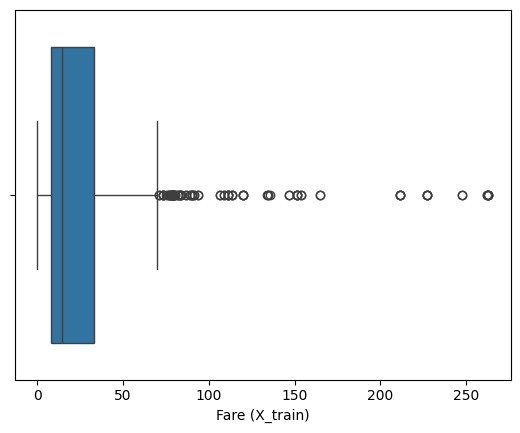

In [56]:
# Boxplot of `Fare` before outlier replacement
sns.boxplot(data = X_train, x = "Fare")
plt.xlabel('Fare (X_train)')
plt.show()

Now lets apply outlier replacement.

In [57]:
X_train.loc[X_train['Fare'] < fare_lower_limit_from_train, 'Fare'] = fare_Q25_from_train
X_train.loc[X_train['Fare'] > fare_upper_limit_from_train, 'Fare'] = fare_Q75_from_train

And reinspect the boxplot...

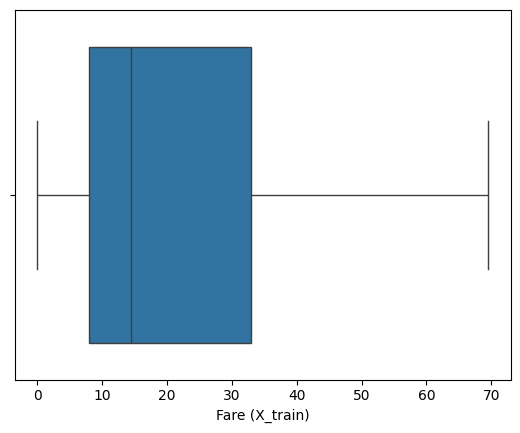

In [58]:
# Boxplot of `Fare` after outlier replacement
sns.boxplot(data = X_train, x = "Fare")
plt.xlabel('Fare (X_train)')
plt.show()

No more outliers :)

We need to apply the *same* outlier detection and replacement on the **test set**. Meaning - use the **train set's** definition and replacement of an outlier on the **test set**.

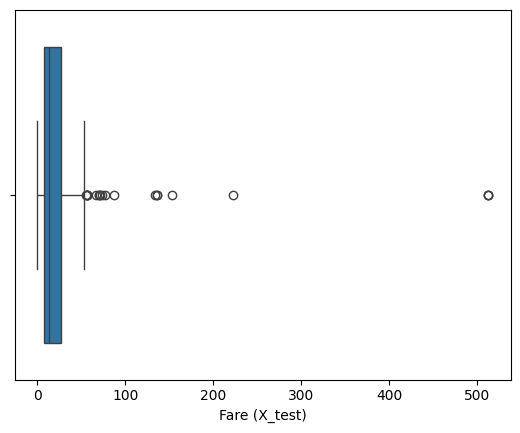

In [59]:
# Boxplot of `Fare` before outlier replacement
sns.boxplot(data = X_test, x = "Fare")
plt.xlabel('Fare (X_test)')
plt.show()

In [99]:
X_test.loc[X_test['Fare'] < fare_lower_limit_from_train, 'Fare'] = fare_Q25_from_train
X_test.loc[X_test['Fare'] > fare_upper_limit_from_train, 'Fare'] = fare_Q75_from_train

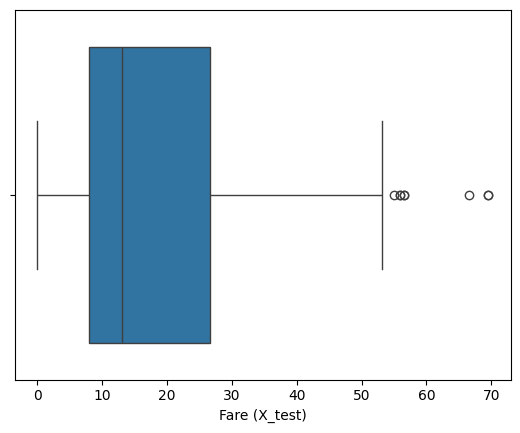

In [100]:
# Boxplot of `Fare` after outlier replacement
sns.boxplot(data = X_test, x = "Fare")
plt.xlabel('Fare (X_test)')
plt.show()

Following this standard will prevent data leakage from happening when replacing outliers. We can also streamline this for all features by defining a helper function.

In [62]:
def replace_outliers(X_train, X_test):
    """
    Outliers in both `X_train` and `X_test` are replaced with the respective quartile (Q25 for lower outliers, Q75 for upper outliers) calculated from the train set.

    Parameters:
    X_train (DataFrame): The training dataset used to compute the IQR and define outliers.   
    X_test (DataFrame): The test dataset whose outliers will be replaced based on the IQR of the training dataset.

    Returns:
    X_train_copy (DataFrame): A copy of the training dataset with outliers replaced.
    X_test_copy (DataFrame): A copy of the test dataset with outliers replaced based on the IQR of the training dataset.
    """
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    columns = X_train.columns

    for column in columns:
        Q25 = X_train_copy[column].quantile(0.25)
        Q75 = X_train_copy[column].quantile(0.75)

        IQR = Q75 - Q25

        upper_limit = Q75 + 1.5 * IQR
        lower_limit = Q25 - 2.5 * IQR

        # Replace outliers in the train set
        X_train_copy.loc[X_train_copy[column] < lower_limit, column] = Q25
        X_train_copy.loc[X_train_copy[column] > upper_limit, column] = Q75

        # Replace outliers in the test set
        X_test_copy.loc[X_test_copy[column] < lower_limit, column] = Q25
        X_test_copy.loc[X_test_copy[column] > upper_limit, column] = Q75
        
    return X_train_copy, X_test_copy

We'll apply this function to every feature of the **train and test sets**. First, lets observe the boxplots of the train set once more before we apply outlier replacement.

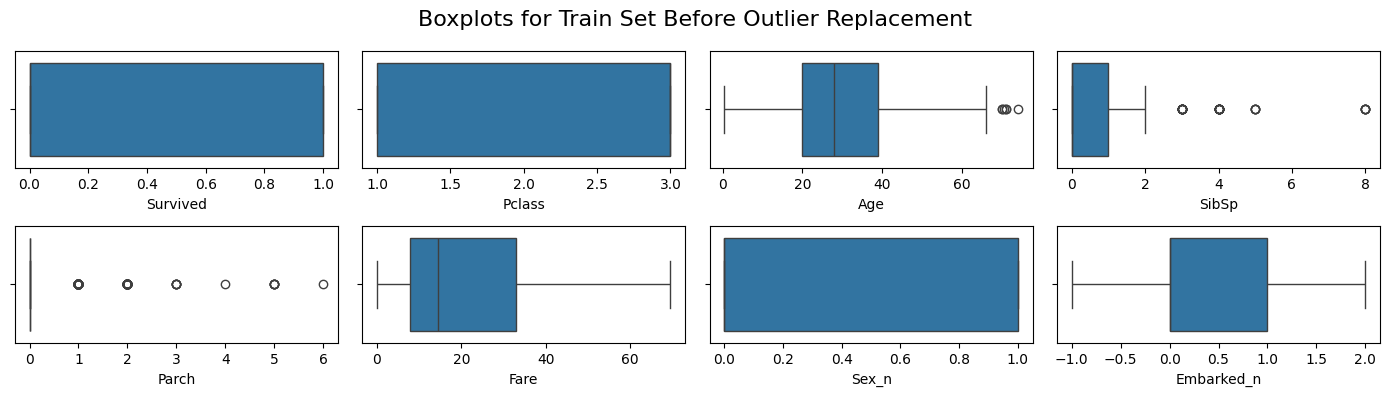

In [63]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], x = y_train)
sns.boxplot(ax = axis[0, 1], data = X_train, x = "Pclass")
sns.boxplot(ax = axis[0, 2], data = X_train, x = "Age")
sns.boxplot(ax = axis[0, 3], data = X_train, x = "SibSp")
sns.boxplot(ax = axis[1, 0], data = X_train, x = "Parch")
sns.boxplot(ax = axis[1, 1], data = X_train, x = "Fare")
sns.boxplot(ax = axis[1, 2], data = X_train, x = "Sex_n")
sns.boxplot(ax = axis[1, 3], data = X_train, x = "Embarked_n")

# Add a title to the figure
plt.suptitle("Boxplots for Train Set Before Outlier Replacement", fontsize=16)

plt.tight_layout()
plt.show()

Now lets apply outlier replacement using our helper function `replace_outliers()`.

In [64]:
X_train, X_test = replace_outliers(X_train, X_test)

And replot the boxplots for the train set.

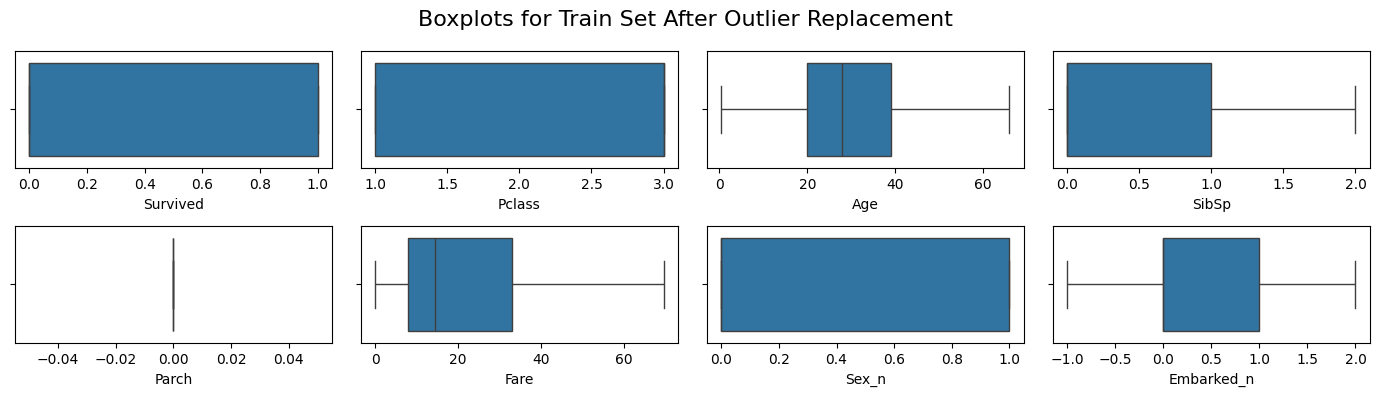

In [65]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], x = y_train)
sns.boxplot(ax = axis[0, 1], data = X_train, x = "Pclass")
sns.boxplot(ax = axis[0, 2], data = X_train, x = "Age")
sns.boxplot(ax = axis[0, 3], data = X_train, x = "SibSp")
sns.boxplot(ax = axis[1, 0], data = X_train, x = "Parch")
sns.boxplot(ax = axis[1, 1], data = X_train, x = "Fare")
sns.boxplot(ax = axis[1, 2], data = X_train, x = "Sex_n")
sns.boxplot(ax = axis[1, 3], data = X_train, x = "Embarked_n")

# Add a title to the figure
plt.suptitle("Boxplots for Train Set After Outlier Replacement", fontsize=16)

plt.tight_layout()
plt.show()

No more outliers :)

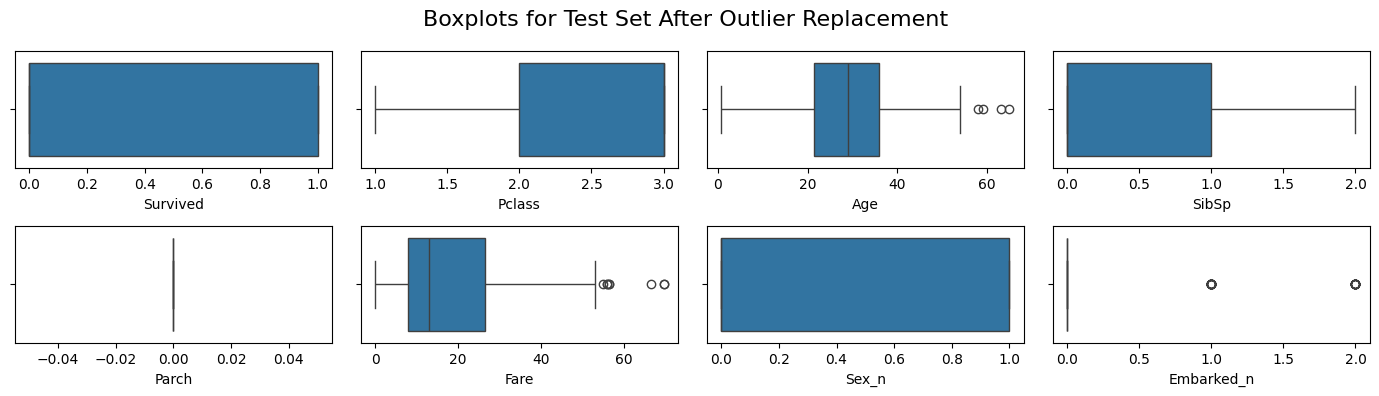

In [66]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], x = y_test)
sns.boxplot(ax = axis[0, 1], data = X_test, x = "Pclass")
sns.boxplot(ax = axis[0, 2], data = X_test, x = "Age")
sns.boxplot(ax = axis[0, 3], data = X_test, x = "SibSp")
sns.boxplot(ax = axis[1, 0], data = X_test, x = "Parch")
sns.boxplot(ax = axis[1, 1], data = X_test, x = "Fare")
sns.boxplot(ax = axis[1, 2], data = X_test, x = "Sex_n")
sns.boxplot(ax = axis[1, 3], data = X_test, x = "Embarked_n")

# Add a title to the figure
plt.suptitle("Boxplots for Test Set After Outlier Replacement", fontsize=16)

plt.tight_layout()
plt.show()

Same for the test set :)

##### Missing Value Analysis
A **missing value** is a space that has no value assigned to it. These can arise from errors in data collection, a refusal to answer in a survey, or the information is not avaiable or applicable. Most models can't handle `NaN`s or `None`s and so we must investigate any missing values and deal with them.

What are our options?

1. **Eliminate Them**:

    - Similar to the previous case of outliers. We may remove valuable rows, though!

2. **Numerical Imputation**:

    - We can fill in the missing values with some numerical variable, normally the procedure is to use the statistical values of the sample. The most common is to **impute** missing values using the *mean*, *mode* or *median* of that feature.

3. **Categorical Imputation**:

    - When the column is categorical, it is usually filled by taking the element of the highest or best category.

**<font color="red">IMPORTANT</font>**: If we decide to impute missing values, we must avoid **data leakage**. Hence, we must use the *mean*, *mode*, *median*, *etc*. from the train set when working with the test set.

As shown earlier, we can check for missing values using `isnull()`.

In [67]:
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467
Sex_n,0,0.000000
Embarked_n,0,0.000000


We can investigate the features that have missing values starting with `Embarked`.

In [68]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
61,1,1,female,38.0,0,0,80.0,NaN,1,-1
829,1,1,female,62.0,0,0,80.0,NaN,1,-1


Ah! Notice that rows with `NaN` for `Embarked` caused a `-1` value to appear in our `Embarked_n` feature (as a result of using `pd.factorize`)! We will need to correct this!

Now lets investigate `Age`.

In [69]:
df[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
5,0,3,male,NaN,0,0,8.4583,Q,0,2
17,1,2,male,NaN,0,0,13.0000,S,0,0
19,1,3,female,NaN,0,0,7.2250,C,1,1
26,0,3,male,NaN,0,0,7.2250,C,0,1
28,1,3,female,NaN,0,0,7.8792,Q,1,2
...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,0,1
863,0,3,female,NaN,8,2,69.5500,S,1,0
868,0,3,male,NaN,0,0,9.5000,S,0,0
878,0,3,male,NaN,0,0,7.8958,S,0,0


Almost $20\%$ of the `Age` feature data is missing! We'll have to deal with this somehow.

We could drop and remove the rows that have a missing value for `Age`. But if we removed these rows, we'd end up removing $20\%$ of our dataset! So it's best to replace, or **impute**, the missing `Age` values.

If we choose to **impute**, then we must do so using only the train set's *mean* or *median* value.

In [70]:
# Impute the missing ages with the train set's median-age value
train_median_age = X_train['Age'].median()
print(f"Train median `Age`: {train_median_age}")

Train median `Age`: 28.0


In [71]:
# Fill the missing values in both the train and test sets using the train median `Age`
X_train['Age'] = X_train['Age'].fillna(train_median_age)
X_test['Age'] = X_test['Age'].fillna(train_median_age)

# Or do
#X_train['Age'].fillna(train_median_age, inplace=True)
#X_test['Age'].fillna(train_median_age, inplace=True

We must take extra care with the `Embarked` feature, though! Why? Because it is a categorical value! 

We have two columns for embarkment location, the original `Embarked` column which contains a categorical string, `Q`, `S`, or `C`. And a custom-made `Embarked_n` feature which converts the strings to a number (`{"S": 0, "C": 1, "Q": 2}`). 

When replacing missing `Embarked` and/or `Embarked_n` values, we should use the most common category, i.e. the **mode**. Since the feature we will actually use is `Embarked_n`, we will just change this one.

We'll replace `-1` in `Embarked_n` with the **mode** from the **train set**.

In [72]:
train_mode_embarked = X_train['Embarked_n'].mode().iloc[0] # Must use .iloc[0] because .mode() returns a Series
print(f"Train mode of `Embarked_n`: {train_mode_embarked}")

Train mode of `Embarked_n`: 0


In [73]:
# Replace -1 in `Embarked_n` with the mode from the train set
X_train.loc[X_train['Embarked_n'] == -1, 'Embarked_n'] = train_mode_embarked
X_test.loc[X_test['Embarked_n'] == -1, 'Embarked_n'] = train_mode_embarked

Lets check for missing values again in both the train and test sets.

In [74]:
# Calculate the total number of missing values for each column
missing_values_train = X_train.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage_train = (X_train.isnull().sum() / len(X_train)) * 100

# Combine both into a DataFrame for better visualization
missing_data_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})
missing_data_train

,Missing Values,Percentage
Age,0,0.0
Pclass,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Sex_n,0,0.0
Embarked_n,0,0.0


In [75]:
# Calculate the total number of missing values for each column
missing_values_test = X_test.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage_test = (X_test.isnull().sum() / len(X_test)) * 100

# Combine both into a DataFrame for better visualization
missing_data_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})
missing_data_test

,Missing Values,Percentage
Age,0,0.0
Pclass,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Sex_n,0,0.0
Embarked_n,0,0.0


No more missing values :)

##### Inference of New Features
If we want to introduce a new feature by combining existing features we can do that here.

If we are doing an element-by-element (each row is independent) calculation, then it can be done on **the train and test data independently**. 

But if we are making a feature which uses a *mean*, *median*, *etc.* (the rows are somehow connected) then we'll need to calculate the *mean*, *median*, *etc.* from **the train set only**.

Let's say we want to add `Sibsp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard) together. This is element-by-element, each row is independent so it's easy to perform.

In [76]:
X_train["FamMembers"] = X_train["SibSp"] + X_train["Parch"]
X_test["FamMembers"] = X_test["SibSp"] + X_test["Parch"]

After creating the `FamMembers` feature by adding `SibSp` and `Parch`, we drop the original columns to avoid redundancy. 

Keeping them would introduce unnecessary duplication and could lead to multicollinearity, which can negatively impact some models. Dropping these columns simplifies the dataset and improves efficiency during model training.

In [77]:
X_train = X_train.drop(['SibSp', 'Parch'], axis=1)
X_test = X_test.drop(['SibSp', 'Parch'], axis=1)

In [78]:
# Inspect the train set
X_train

,Age,Pclass,Fare,Sex_n,Embarked_n,FamMembers
290,26.0,1,33.0000,1,0,0
520,30.0,1,33.0000,1,0,0
69,26.0,3,8.6625,0,0,2
120,21.0,2,33.0000,0,0,2
436,21.0,3,34.3750,1,0,2
...,...,...,...,...,...,...
779,43.0,1,33.0000,1,0,0
612,28.0,3,15.5000,1,2,1
46,28.0,3,15.5000,0,2,1
472,33.0,2,27.7500,1,0,1


##### Feature Scaling
A crucial step in EDA is to **scale** the values of our columns. There are many wayt to scale, but two common methods are:

1. **Normalizing**: This transforms a column/feature so that **its mean is $0$**, and **its standard deviation is $1$**.

2. **Min-Max Scaling**: This transforms a column/feature so that **its minimum vlaue is $0$** and **its maximum value is $1$**.

Some models perform better when the data is scaled (e.g. Regression models, K-Nearest-Neighbors, K-Means Clustering, Support Vector Machines, Neural Networks).

Others don't really require scaling (e.g. Decision Trees, Random Forest, Naive Bayes).

Also, not all features need to be scaled. We can scale numerical (e.g. `float`, `int`) features, especially if they take a large range of values. But categorical features may not need to be scaled (I've seen arguments both ways). When in doubt, there's no harm in *experimenting*!

**<font color="red">IMPORTANT</font>**: But always remember - to avoid **data leakage** the calculations involved in scaling (*mean*, *min*, *max*, *etc.*) are derived only from the train set.

`sklearn.preprocessing` already has a scaler we can use!

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

To get a sense of what `StandardScaler` does, look at the `Age` data from the train set before scaling.

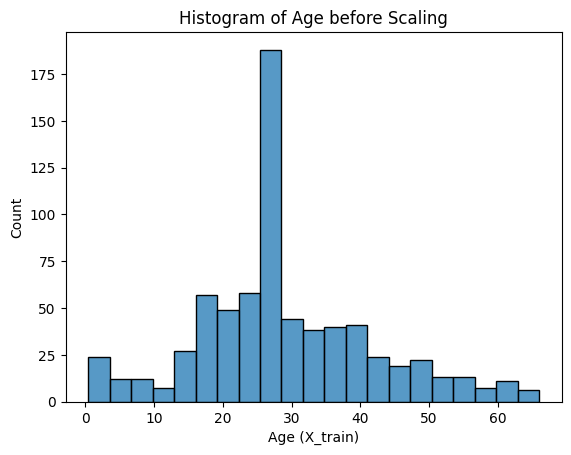

In [80]:
sns.histplot(data = X_train, x = "Age")
plt.xlabel("Age (X_train)")
plt.title("Histogram of Age before Scaling")
plt.show()

We can also observe its mean and standard deviation (before scaling).

In [81]:
X_train['Age'].mean(), X_train['Age'].std()

(29.217935393258426, 12.708814092865454)

Now we'll fit our scaler to **only the train set**.

In [82]:
scaler.fit(X_train)

StandardScaler()

And then apply scaling to **both the train and test sets**.

In [83]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now both `X_train_scaled` and `X_test_scaled` are NumPy arrays.

In [84]:
X_train_scaled

array([[-0.25338301, -1.50182066,  0.84645583,  1.33057432, -0.58857917,
        -0.65137693],
       [ 0.06158044, -1.50182066,  0.84645583,  1.33057432, -0.58857917,
        -0.65137693],
       [-0.25338301,  0.85865685, -0.80735412, -0.75155516, -0.58857917,
         3.13458531],
       ...,
       [-0.09590128,  0.85865685, -0.34272441, -0.75155516,  2.5271708 ,
         1.24160419],
       [ 0.29780303, -0.32158191,  0.48970176,  1.33057432, -0.58857917,
         1.24160419],
       [-2.14316372,  0.85865685,  1.30089257, -0.75155516, -0.58857917,
         1.24160419]])

We can visualize this as a Pandas DataFrame.

In [85]:
pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

,Age,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,-0.253383,-1.501821,0.846456,1.330574,-0.588579,-0.651377
1,0.061580,-1.501821,0.846456,1.330574,-0.588579,-0.651377
2,-0.253383,0.858657,-0.807354,-0.751555,-0.588579,3.134585
3,-0.647087,-0.321582,0.846456,-0.751555,-0.588579,3.134585
4,-0.647087,0.858657,0.939891,1.330574,-0.588579,3.134585
...,...,...,...,...,...,...
707,1.085212,-1.501821,0.846456,1.330574,-0.588579,-0.651377
708,-0.095901,0.858657,-0.342724,1.330574,2.527171,1.241604
709,-0.095901,0.858657,-0.342724,-0.751555,2.527171,1.241604
710,0.297803,-0.321582,0.489702,1.330574,-0.588579,1.241604


Compared to the original `X_train`,

In [86]:
X_train

,Age,Pclass,Fare,Sex_n,Embarked_n,FamMembers
290,26.0,1,33.0000,1,0,0
520,30.0,1,33.0000,1,0,0
69,26.0,3,8.6625,0,0,2
120,21.0,2,33.0000,0,0,2
436,21.0,3,34.3750,1,0,2
...,...,...,...,...,...,...
779,43.0,1,33.0000,1,0,0
612,28.0,3,15.5000,1,2,1
46,28.0,3,15.5000,0,2,1
472,33.0,2,27.7500,1,0,1


Lets take a look at our new scaled `Age` column and see how the `StandardScaled` affected the data.

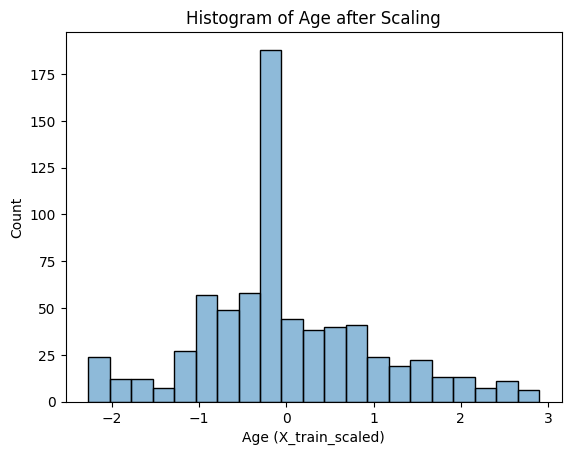

In [87]:
sns.histplot(data = X_train_scaled[:, X_train.columns == 'Age'], legend=False)
plt.xlabel("Age (X_train_scaled)")
plt.title("Histogram of Age after Scaling")
plt.show()

We can also observe its mean and standard deviation (after scaling).

In [88]:
# The mean is now 0 and the standard deviation is 1
X_train_scaled[:, X_train.columns == 'Age'].mean(), X_train_scaled[:, X_train.columns == 'Age'].std()

(9.7300444854789e-17, 0.9999999999999998)

**<font color="red">Note</font>**: We don't perform scaling on our **target (y)** variable.

##### Feature Selection
We're almost ready to take this dataset and place it in a machine learning model now. But before we do so, it would be good to invistigate which features are the most relevant for predicting survivability.

We don't want to include too many features as it may make the model more complicated than it needs to be and impact performance. Also, reducing the number of features can make the model easier to understand, and faster too.

We'll use the `sklearn.SelectKBest` tool to select the five most important features in our dataset using an ANOVA statistical test (`f_classif`).

In [89]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scaled, y_train)

SelectKBest(k=5)

In [90]:
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])

In [91]:
# Inspecting X_train_sel (with the five most important features)
X_train_sel

,Pclass,Fare,Sex_n,Embarked_n,FamMembers
0,-1.501821,0.846456,1.330574,-0.588579,-0.651377
1,-1.501821,0.846456,1.330574,-0.588579,-0.651377
2,0.858657,-0.807354,-0.751555,-0.588579,3.134585
3,-0.321582,0.846456,-0.751555,-0.588579,3.134585
4,0.858657,0.939891,1.330574,-0.588579,3.134585
...,...,...,...,...,...
707,-1.501821,0.846456,1.330574,-0.588579,-0.651377
708,0.858657,-0.342724,1.330574,2.527171,1.241604
709,0.858657,-0.342724,-0.751555,2.527171,1.241604
710,-0.321582,0.489702,1.330574,-0.588579,1.241604


Looks like `Age` didn't make the cut. Surprising! We can also obtain the score for each column, which states how relevant each column was to the target (`Survived`).

In [92]:
dict(zip(X_train.columns,selection_model.scores_))

{'Age': 2.9150218947778326,
 'Pclass': 96.0245583631468,
 'Fare': 55.03755516070664,
 'Sex_n': 282.3578401747155,
 'Embarked_n': 4.8746165513153406,
 'FamMembers': 7.6262233480845865}

Now we can save the fully processed data so that we can come back and train a model with it. Again, its more secure to save your data in a database.

In [93]:
# Adding the `Survived` column back to `X_train_sel` and `X_test_sel`
# Note: You will need to separate the features and target for modeling
X_train_sel['Survived'] = list(y_train)
X_test_sel['Survivied'] = list(y_test)

X_train_sel.to_sql('Titanic_Clean_Train', con=engine, if_exists='replace', index=False)
print("Dataset stored in SQLite database as 'Titanic_Clean_Train' table.")

X_test_sel.to_sql('Titanic_Clean_Test', con=engine, if_exists='replace', index=False)
print("Dataset stored in SQLite database as 'Titanic_Clean_Test' table.")

Dataset stored in SQLite database as 'Titanic_Clean_Train' table.
Dataset stored in SQLite database as 'Titanic_Clean_Test' table.


In [94]:
# Query the data from the SQLite database
X_train_from_db = pd.read_sql('SELECT * FROM Titanic_Clean_Train', con=engine)
X_train_from_db.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers,Survived
0,-1.501821,0.846456,1.330574,-0.588579,-0.651377,1
1,-1.501821,0.846456,1.330574,-0.588579,-0.651377,1
2,0.858657,-0.807354,-0.751555,-0.588579,3.134585,0
3,-0.321582,0.846456,-0.751555,-0.588579,3.134585,0
4,0.858657,0.939891,1.330574,-0.588579,3.134585,0


In [95]:
# Query the data from the SQLite database
X_test_from_db = pd.read_sql('SELECT * FROM Titanic_Clean_Test', con=engine)
X_test_from_db.head()

,Pclass,Fare,Sex_n,Embarked_n,FamMembers,Survivied
0,0.858657,-0.859454,-0.751555,-0.588579,-0.651377,0
1,0.858657,-0.859454,-0.751555,-0.588579,-0.651377,0
2,0.858657,-0.859454,-0.751555,-0.588579,-0.651377,0
3,0.858657,-0.904751,-0.751555,0.969296,-0.651377,0
4,0.858657,-0.342724,1.330574,2.527171,1.241604,1


Or if you are feeling lazy, you can save the data as CSV file in the `data/processed` folder.

In [96]:
# Define the path to store the dataset
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
X_train_sel.to_csv(f'{output_dir}/titanic_clean_train.csv', index=False)
print(f'Dataset stored as {output_dir}/titanic_clean_train.csv')

X_test_sel.to_csv(f'{output_dir}/titanic_clean_test.csv', index=False)
print(f'Dataset stored as {output_dir}/titanic_clean_test.csv')

Dataset stored as data/processed/titanic_clean_train.csv
Dataset stored as data/processed/titanic_clean_test.csv
